In [1]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vr2f.staticinfo import COLORS, PATHS

In [6]:
paths = PATHS()
colors = COLORS()

In [3]:

cond_dict = {
    "viewcond": {1: "mono", 2: "stereo"},
    "emotion": {1: "neutral", 2: "happy", 3: "angry", 4: "surprised"},
    "avatar_id": {1: "Woman_01", 2: "Woman_04", 3: "Woman_08"},
}

In [4]:
# read in the preprocessed data
pattern = "withoutblinks"

sub_list_str_et = [f for f in os.listdir(paths.DATA_ET_PREPROC) if pattern in f]
sub_list_str_et = [f.split("-")[0] for f in sub_list_str_et]
sub_list_str_et = np.unique(sorted(sub_list_str_et))

data_preproc = []
for sub_id in sorted(sub_list_str_et):
    fname = Path(paths.DATA_ET_PREPROC, f"{sub_id}-ET-{pattern}.csv")
    df_clean = pd.read_csv(fname, sep=",")
    df_clean["sub_id"] = sub_id
    data_preproc.append(df_clean)

df_all = pd.concat(data_preproc, ignore_index=True)

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


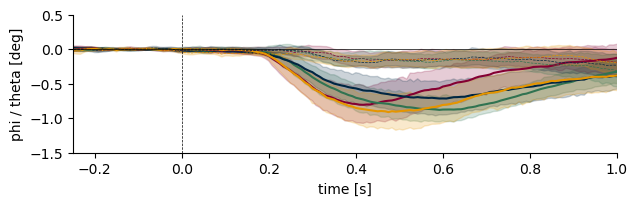

In [11]:
save_to_file = True

df_all["times"] = df_all["times"].round(3)
cm = 1 / 2.54
emotions = cond_dict["emotion"].values()

fig, ax = plt.subplots(figsize=(16.4587 * cm, 5.5 * cm))

df_plt = (df_all
            .copy()
            .groupby(["sub_id", "times", "emotion"],
            as_index=False)
            .agg(phi =  ("phi", "mean"), 
                 theta = ("theta", "mean")))

# flip phi so that negative angles go downwards
df_plt["phi"] = df_plt["phi"].apply(lambda x: x * -1)

sns.lineplot(
    x="times",
    y="phi",
    hue="emotion",
    data=df_plt,
    ax=ax,
    errorbar=("ci", 95),
    palette={emo: colors.COLDICT[emo] for emo in emotions},
)
sns.lineplot(
    x="times",
    y="theta",
    hue="emotion",
    data=df_plt,
    ax=ax,
    errorbar=("ci", 95),
    palette={emo: colors.COLDICT[emo] for emo in emotions},
    linestyle="--",
    linewidth=0.5,
    dashes=(14, 14),
)
ax.set_xlim(-0.25, 1.0)
ax.set_ylim(-1.5, 0.5)
ax.set_ylabel("phi / theta [deg]")
ax.set_xlabel("time [s]")
plt.axvline(0, color="k", linestyle="--", linewidth=0.5)
plt.axhline(0, color="k", linestyle="-", linewidth=0.5)
plt.tight_layout()
# remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# dont show the legend
ax.get_legend().remove()
if save_to_file:
    # save as pdf
    fpath = Path(paths.FIGURES, "ET")
    if not fpath.exists():
        fpath.mkdir(parents=True)
    fname = Path(fpath, "ET-phi-theta.pdf")
    matplotlib.rcParams["pdf.fonttype"] = 42
    matplotlib.rcParams["ps.fonttype"] = 42
    matplotlib.rcParams["font.family"] = "Roboto"
    plt.savefig(fname, dpi=300, bbox_inches="tight", transparent=True)

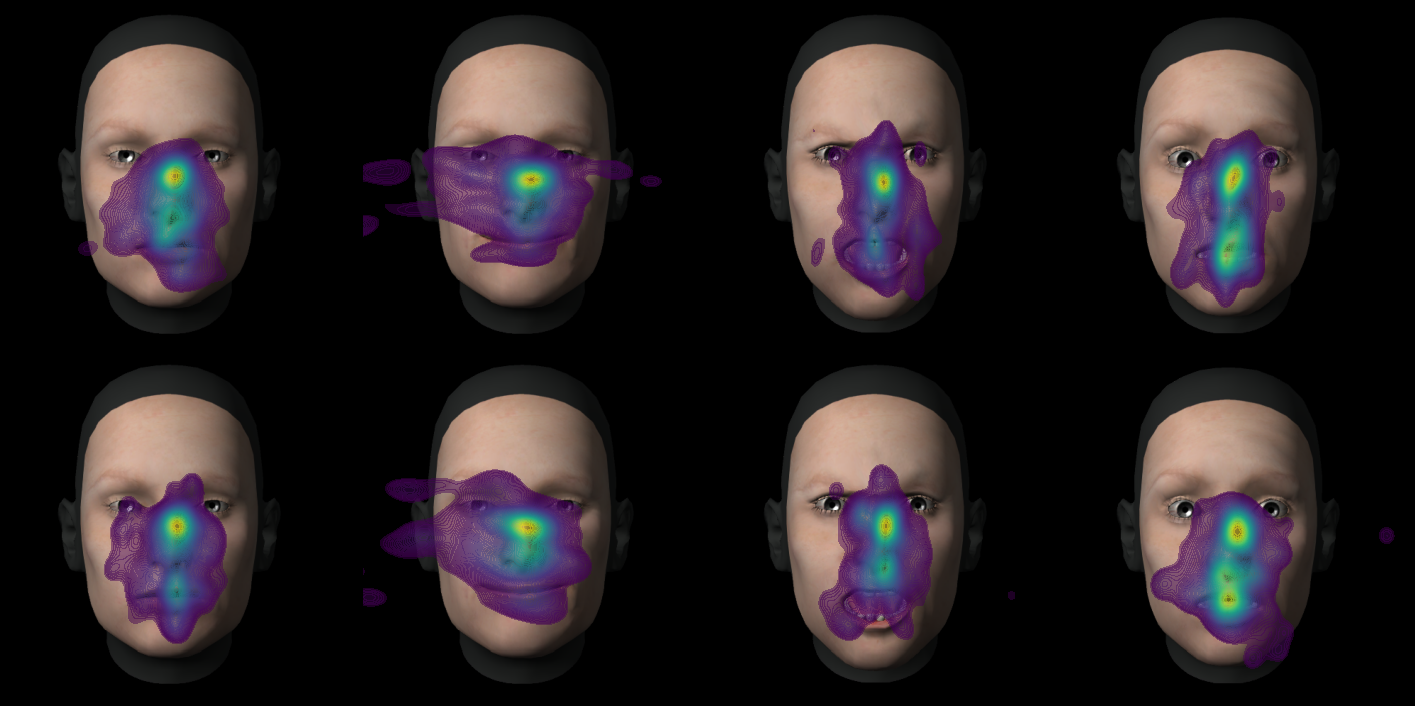

In [13]:
sub_id_plt = "VR2FEM_S10"
img = plt.imread(Path(paths.STIMULIIMAGES, "Woman_08_Angry.png"))
im2 = img[245:-245, 245:-245, :]
height, width, _ = im2.shape

# fig, axs = plt.subplots(3, 4*2, figsize=(12*4/3*2, 12))
fig, axs = plt.subplots(2, 4, figsize=(18, 9))
# set the figure background to black
fig.patch.set_facecolor("black")
fig.patch.set_alpha(1.0)
# set the axes background to black
for ax in axs.flatten():
    ax.patch.set_facecolor("black")
    ax.patch.set_alpha(1.0)
# reduce the space between the subplots
fig.subplots_adjust(hspace=0.02, wspace=0.05)

for vc_idx, viewcond in enumerate(cond_dict["viewcond"].values()):  # noqa: B007
    for av_idx, av_name in enumerate(list(cond_dict["avatar_id"].values())[1:2]):  # noqa: B007
        for emo_idx, emotion in enumerate(cond_dict["emotion"].values()):
            # ax = axs[av_idx, emo_idx + vc_idx*4]
            ax = axs[vc_idx, emo_idx]
            data_plot = (
                df_all.query("times > 0.25 & times < 1")
                .query("emotion == @emotion")
                .query("avatar_id == @av_name")
                .query("viewcond == @viewcond")
                .query(f"sub_id == '{sub_id_plt}'")
            )
            # flip phi so that negative angles go downwards
            data_plot["phi"] = data_plot["phi"].apply(lambda x: x * -1)

            sns.kdeplot(
                data=data_plot,
                x="theta",
                y="phi",
                fill=True,
                cmap="viridis",
                levels=100,
                thresh=0.05,
                alpha=0.45,
                ax=ax,
            )

            img = plt.imread(Path(paths.STIMULIIMAGES, f"{av_name}_{emotion.capitalize()}.png"))
            cutval = 205
            im2 = img[cutval + 35 : -cutval, cutval + 35 : -cutval, :]
            height, width, _ = im2.shape
            # Overlay the image onto the plot, centered on the axes
            ax.imshow(im2, extent=[-5, 5, -5, 5], alpha=1)
            # hide the axes and the ticks and labels
            ax.axis("off")

# save as pdf
fpath = Path(paths.FIGURES, "ET")
if not fpath.exists():
    fpath.mkdir(parents=True)
plt.savefig(Path(fpath, f"Heatmaps_{sub_id_plt}.pdf"), dpi=300, bbox_inches="tight", pad_inches=0)


# plt.imshow(im2, aspect='auto', alpha=0.5)

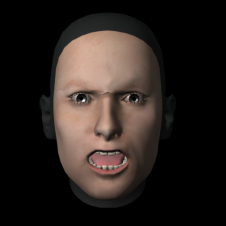

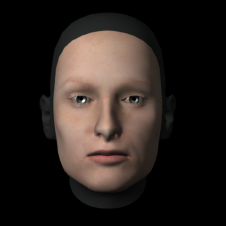

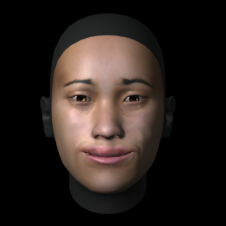

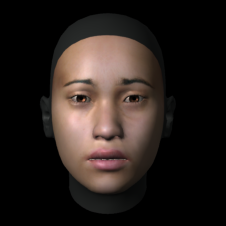

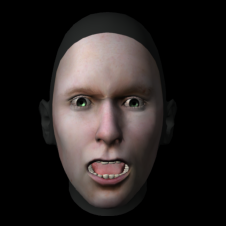

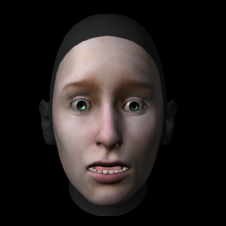

In [358]:
av_names = (
    cond_dict["avatar_id"][2],
    cond_dict["avatar_id"][2],
    cond_dict["avatar_id"][1],
    cond_dict["avatar_id"][1],
    cond_dict["avatar_id"][3],
    cond_dict["avatar_id"][3],
)
emotions = ("angry", "neutral", "happy", "neutral", "angry", "surprised")

for av_name, emotion in zip(av_names, emotions, strict=False):
    fig, ax = plt.subplots(1, figsize=(6 * cm, 6 * cm))

    img = plt.imread(f"{av_name}_{emotion.capitalize()}.png")
    cutval = 205
    im2 = img[cutval + 35 : -cutval, cutval + 35 : -cutval, :]
    height, width, _ = im2.shape
    # Overlay the image onto the plot, centered on the axes
    ax.imshow(im2, alpha=1, aspect="auto")
    # hide the axes and the ticks and labels
    ax.axis("off")
    # remove the white space around the image
    plt.tight_layout()
    # set background to transparent
    fig.patch.set_facecolor("black")
    fig.patch.set_alpha(1.0)
    ax.patch.set_facecolor("black")
    ax.patch.set_alpha(1.0)
    # save as pdf
    fpath = Path(paths.FIGURES)
    fname = Path(fpath, f"{av_name}_{emotion.capitalize()}.pdf")
    plt.savefig(
        fname,
        dpi=300,
        # bbox_inches='tight',
        pad_inches=0,
        transparent=True,
    )

In [159]:
# %% load libs:
import json
import multiprocessing as mp
import sys
from collections import defaultdict
from os import path as op

import mne
import numpy as np
import seaborn as sns

# from mne.epochs import concatenate_epochs
from mne.decoding import GeneralizingEstimator, LinearModel, SlidingEstimator, cross_val_multiscore, get_coef
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import BaseCrossValidator, StratifiedKFold, check_cv
from sklearn.pipeline import make_pipeline


def decode_core(X, y, groups, scoring="roc_auc", temp_gen=False, n_cv_folds=5, cv_random_state=None):
    clf = make_pipeline(
        mne.decoding.Vectorizer(), LinearModel(LogisticRegression(solver="liblinear", random_state=42, verbose=False))
    )

    if temp_gen:
        gen_str = "gen_temp"
        se = GeneralizingEstimator(clf, scoring=scoring, n_jobs=15, verbose=0)
    else:
        gen_str = ""
        se = SlidingEstimator(clf, scoring=scoring, n_jobs=15, verbose=0)
    if groups is None:
        cv = StratifiedKFold(n_splits=n_cv_folds)
    else:
        cv = CrossDecodSplitter(n_splits=n_cv_folds)
    scores = cross_val_multiscore(se, X, y, cv=cv, groups=groups, n_jobs=n_cv_folds)

    se.fit(X, y)
    patterns = get_coef(se, "patterns_", inverse_transform=True)

    return scores, patterns

In [ ]:
# select only columns phi and theta
df_s = df_all[["times", "theta", "phi", "viewcond", "avatar_id", "emotion", "sub_id", "trial_num"]]

# scores_all = defaultdict(list)

for sub_id in sub_list_str_et:
    df_ = df_s.query("sub_id == @sub_id")

    # add an index which counts from 0 up, for each trial_num
    df_["times_idx"] = df_.groupby("trial_num").cumcount()
    iidx = pd.MultiIndex.from_product(
        [df_["trial_num"].unique(), df_["times_idx"].unique()],
        names=["trial_num", "times_idx"],
    )
    df_p = pd.pivot_table(df_, values=["phi", "theta"], index=["trial_num", "times_idx"]).reindex(iidx)

    df_p["phi"] = df_p["phi"].interpolate(method="linear")
    df_p["theta"] = df_p["theta"].interpolate(method="linear")
    X = df_p.to_numpy().reshape(df_["trial_num"].nunique(), df_["times_idx"].nunique(), 2).swapaxes(1, 2)

    y = df_.query("times_idx == 0")["emotion"].to_numpy()

    times = df_.groupby("times_idx").mean()["times"].to_numpy()
    sc, pat = decode_core(
        X,
        y,
        groups=None,
        temp_gen=False,
        n_cv_folds=5,
        scoring="roc_auc_ovr",
    )
    scores_all["allemos"].append(sc)

In [242]:
scores_all_arr = np.array(scores_all["allemos"])
sca = scores_all_arr.mean(axis=1)

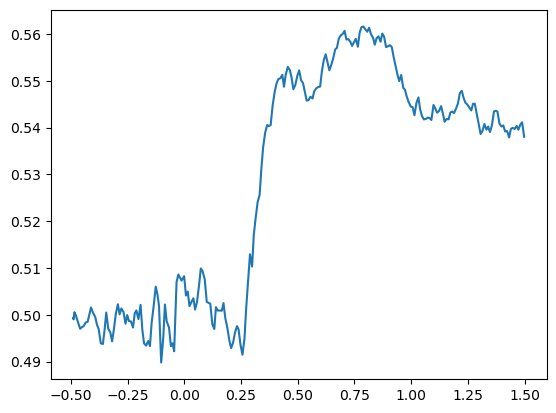

In [243]:
plt.plot(times, sca)

In [326]:
# select only columns phi and theta
df_s = df_all[["times", "theta", "phi", "viewcond", "avatar_id", "emotion", "sub_id", "trial_num"]]


def decode_et(df, sub_id, factor, contrast, scoring, reps=50):
    df_ = df.query("sub_id == @sub_id").query(f"{factor} in @contrast")

    # add an index which counts from 0 up, for each trial_num
    df_["times_idx"] = df_.groupby("trial_num").cumcount()
    iidx = pd.MultiIndex.from_product(
        [df_["trial_num"].unique(), df_["times_idx"].unique()],
        names=["trial_num", "times_idx"],
    )
    df_p = pd.pivot_table(df_, values=["phi", "theta"], index=["trial_num", "times_idx"]).reindex(iidx)
    df_p["phi"] = df_p["phi"].interpolate(method="linear")
    df_p["theta"] = df_p["theta"].interpolate(method="linear")

    # throw away trials which still contain nan values
    times = df_.groupby("times_idx").mean()["times"].to_numpy()
    idx_na = df_p.groupby("trial_num")["phi"].apply(lambda x: x.isna().sum() > 0).to_numpy()
    df_p = df_p[~np.repeat(idx_na, len(times))]

    X = (
        df_p.to_numpy()
        .reshape(df_p.reset_index()["trial_num"].nunique(), df_p.reset_index()["times_idx"].nunique(), 2)
        .swapaxes(1, 2)
    )

    y = df_.query("times_idx == 0")["emotion"].to_numpy()
    y = y[~idx_na]
    sc_tmp = []
    for i in range(reps):
        sc, _ = decode_core(X, y, groups=None, temp_gen=False, n_cv_folds=5, scoring=scoring)
        sc_tmp.append(sc)
    sc = np.array(sc_tmp).mean(axis=0)
    return sc, times

In [336]:
from functools import partial

df_s = df_all[["times", "theta", "phi", "viewcond", "avatar_id", "emotion", "sub_id", "trial_num"]]

factor = "emotion"
scoring = "roc_auc_ovr"

scores_all = defaultdict(list)
times_all = defaultdict(list)
pats_all = defaultdict(list)

save_scores = True

for contrast in [
    ("surprised", "neutral", "angry", "happy")
]:  # [('angry', 'neutral'), ('happy', 'neutral'), ('angry', 'surprised')]:
    for sub_id in sorted(sub_list_str_et):
        print("Running subject: ", sub_id)
        sc, times = decode_et(df_s, sub_id, factor="emotion", contrast=contrast, scoring=scoring, reps=50)
        scores_all[sub_id].append(sc)
        pats_all[sub_id].append(pat)
        times_all[sub_id].append(times)

        # save shizzle:
        contrast_str = "_vs_".join(contrast)
        conditions_vc = ""

        path_save = Path(
            paths.DATA_04_DECOD_SENSORSPACE,
            "ET",
            conditions_vc,
            contrast_str,
            scoring,
        )

        # save accuracies:
        if save_scores:
            fpath = Path(path_save, "scores")
            fpath.mkdir(exist_ok=True, parents=True)
            fname = Path(fpath, f"{sub_id}-scores_per_sub.npy")
            np.save(fname, sc)
            np.save(str(fname)[:-4] + "__times" + ".npy", times)
            del (fpath, fname)

Running subject:  VR2FEM_S01


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
  0%|          | Fitting SlidingEstimator : 0/241 [00:00<?,       ?it/s]
  0%|          | Fitting SlidingEstimator : 0/241 [00:00<?,       ?it/s]
  0%|          | Fitting SlidingEstimator : 0/241 [00:00<?,       ?it/s]
  0%|          | Fitting SlidingEstimator : 0/241 [00:00<?,       ?it/s]
  0%|          | Fitting SlidingEstimator : 0/241 [00:00<?,       ?it/s]
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   21.3s remaining:   32.0s


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'surprised'

In [334]:
scores_all_4m = scores_all.copy()

In [325]:
scores = defaultdict(dict)
scores[contrast_str] = scores_all

In [ ]:
for sub_id in sorted(sub_list_str_et):
    df_ = df_s.query("sub_id == @sub_id").query("emotion == 'angry' | emotion == 'neutral'")

    # add an index which counts from 0 up, for each trial_num
    df_["times_idx"] = df_.groupby("trial_num").cumcount()
    iidx = pd.MultiIndex.from_product(
        [df_["trial_num"].unique(), df_["times_idx"].unique()],
        names=["trial_num", "times_idx"],
    )
    df_p = pd.pivot_table(df_, values=["phi", "theta"], index=["trial_num", "times_idx"]).reindex(iidx)
    df_p["phi"] = df_p["phi"].interpolate(method="linear")
    df_p["theta"] = df_p["theta"].interpolate(method="linear")

    # throw away trials which still contain nan values
    idx_na = df_p.groupby("trial_num")["phi"].apply(lambda x: x.isna().sum() > 0).to_numpy()
    df_p = df_p[~np.repeat(idx_na, len(times))]

    X = (
        df_p.to_numpy()
        .reshape(df_p.reset_index()["trial_num"].nunique(), df_p.reset_index()["times_idx"].nunique(), 2)
        .swapaxes(1, 2)
    )

    y = df_.query("times_idx == 0")["emotion"].to_numpy()
    y = y[~idx_na]
    times = df_.groupby("times_idx").mean()["times"].to_numpy()
    sc, pat = decode_core(X, y, groups=None, temp_gen=False, n_cv_folds=5, scoring="roc_auc")
    scores_all["angry_vs_neutral"].append(sc)

In [220]:
happy_vs_neutral = np.array(scores_all["happy_vs_neutral"]).mean(axis=0).mean(axis=0)

In [205]:
angry_vs_surprised = np.array(scores_all["angry_vs_surprised"]).mean(axis=0).mean(axis=0)
angry_vs_neutral = np.array(scores_all["angry_vs_neutral"]).mean(axis=0).mean(axis=0)

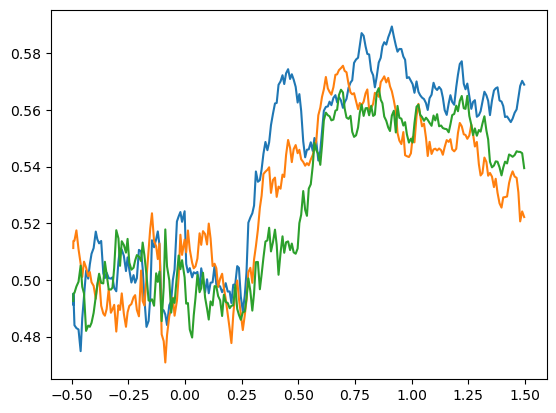

In [206]:
plt.plot(times, pltme)
plt.plot(times, hap_vs_neut)
plt.plot(times, angry_vs_surprised)

In [244]:
df2plot = pd.DataFrame()
for contrast in ["allemos", "angry_vs_surprised", "angry_vs_neutral", "happy_vs_neutral"]:
    vals = np.array(scores_all[contrast]).mean(axis=1).flatten()
    ttimes = np.tile(times, 16)
    ids = np.repeat(np.arange(16), len(times))
    plt_df = pd.DataFrame({"times": ttimes, "vals": vals, "ids": ids})
    plt_df["contrast"] = contrast
    df2plot = pd.concat([df2plot, plt_df])

<AxesSubplot:xlabel='times', ylabel='vals'>

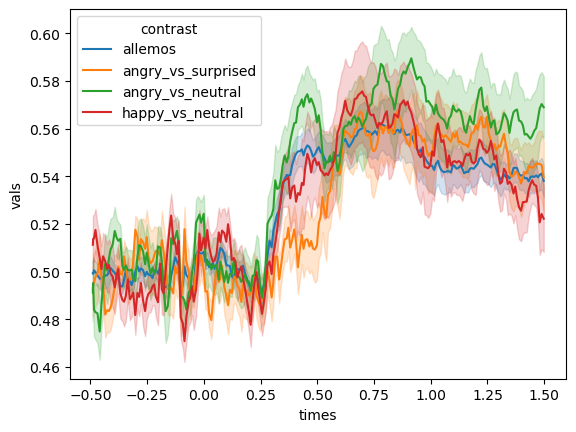

In [245]:
sns.lineplot(data=df2plot, x="times", y="vals", hue="contrast", errorbar="se")

In [224]:
ttimes.shape

(3856,)

In [226]:
vals.shape

(7712,)

In [234]:
contrast = "angry_vs_neutral"
np.array(scores_all[contrast]).shape

(32, 5, 241)

In [230]:
scores_all.keys()

dict_keys(['angry_vs_neutral', 'happy_vs_neutral', 'angry_vs_surprised'])

In [237]:
scores_all["angry_vs_neutral"] = scores_all["angry_vs_neutral"][:16]

In [236]:
scores_all["angry_vs_neutral"][16]

array([[0.52489331, 0.51920341, 0.5398293 , ..., 0.5512091 , 0.51209104,
        0.50426743],
       [0.48719772, 0.5       , 0.48435277, ..., 0.6173542 , 0.61948791,
        0.58819346],
       [0.51789627, 0.52227904, 0.53688824, ..., 0.59751644, 0.60628196,
        0.59897736],
       [0.51497443, 0.52520088, 0.51205259, ..., 0.6055515 , 0.60628196,
        0.59021183],
       [0.61577794, 0.58875091, 0.55076698, ..., 0.54054054, 0.5339664 ,
        0.5266618 ]])